### IET Report:



---
This modules is for importing various packages for the machine learning model




In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score


This module is to import the dataset for the model

In [ ]:
data1=pd.read_csv('drive/MyDrive/Dataset/data.csv')
data=load_breast_cancer()
x=pd.DataFrame(data.data,columns=data.feature_names)
y=data.target

This module is to spearate the Training data and testing data for the model

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

This model imports the model I am using for this project

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gdc=GradientBoostingClassifier()
gdc.fit(x_train,y_train)
print(accuracy_score(y_test,gdc.predict(x_test)))
result1=accuracy_score(y_test,gdc.predict(x_test))

0.9736842105263158


In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print(accuracy_score(y_test,y_predict))
result2=accuracy_score(y_test,y_predict)

0.9824561403508771


This module is used to compare the results of model.

In [ ]:
if(result1>result2):
  comparison=result1-result2
  print(f"Gradient Boosting Classifier is efficient by {comparison*100}")
else:
  comparison=result2-result1
  print(f"XGBoost classifier is efficient by {comparison*100}")

XGBoost classifier is efficient by 0.877192982456132


This module is to visualize the data for finding the perfect algorithm

In [ ]:
data1 = data1.drop('id',axis=1)
data1 = data1.drop('Unnamed: 32',axis=1)
# Mapping Benign to 0 and Malignant to 1
data1['diagnosis'] = data1['diagnosis'].map({'M':1,'B':0})
#Check the data stats
data1.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
datas = pd.DataFrame(preprocessing.scale(data1.iloc[:,1:32]))
datas.columns = list(data1.iloc[:,1:32].columns)
datas['diagnosis'] = data1['diagnosis']

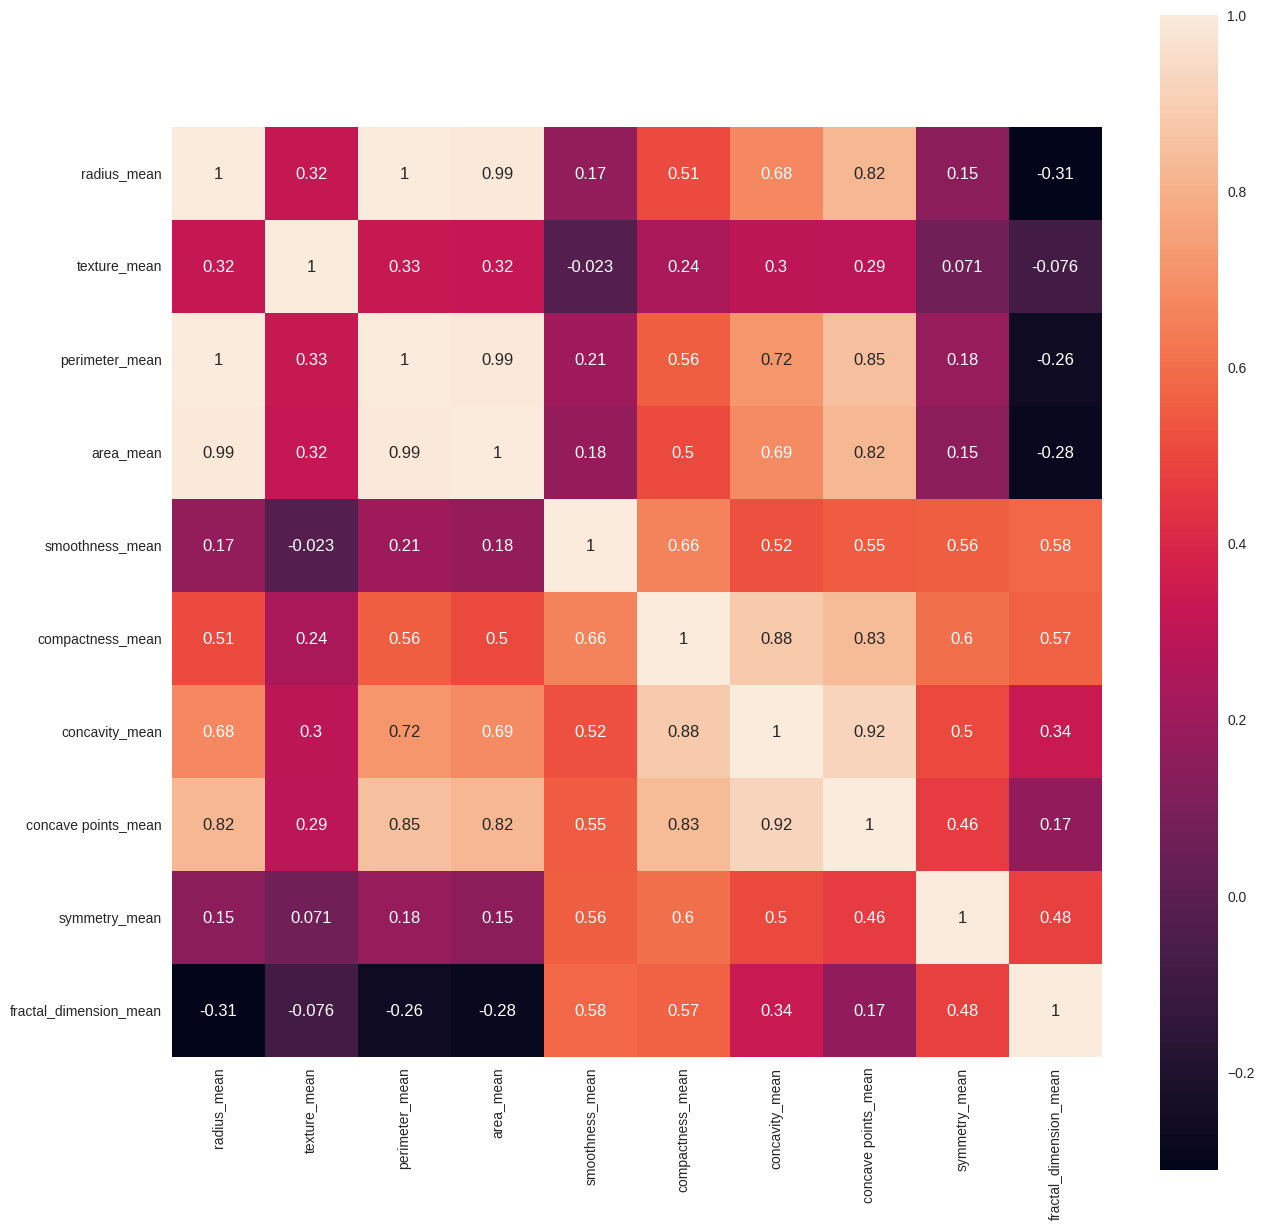

In [ ]:
features_mean = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(15,15))
heat = sns.heatmap(datas[features_mean].corr(), vmax=1, square=True, annot=True)

Text(0.5, 1.0, 'PCA Scatter Plot')

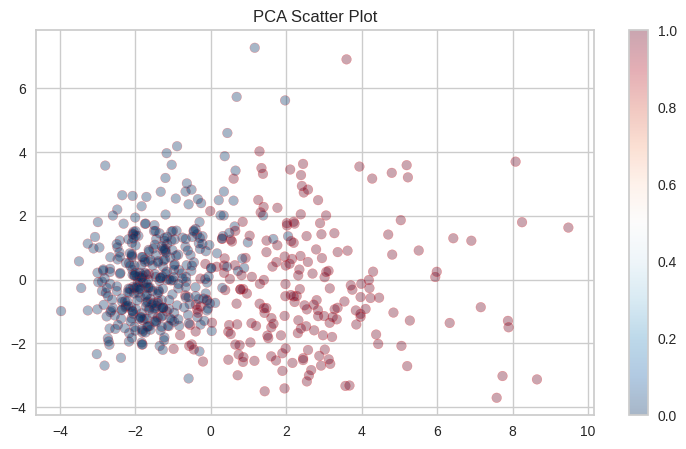

In [ ]:

data_drop = datas.drop('diagnosis',axis=1)
data_drop = data_drop[features_mean]
X = data_drop.values
pca = PCA(n_components=2) #Binary Classifier
pca = pca.fit_transform(X)
plt.figure(figsize = (9,5))
plt.scatter(pca[:,0],pca[:,1], c = datas['diagnosis'], cmap = "RdBu_r", edgecolor = "Red", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.002s...
[t-SNE] Computed neighbors for 569 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 0.863701
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.400856
[t-SNE] KL divergence after 1400 iterations: 0.763299


Text(0.5, 1.0, 't-SNE Scatter Plot')

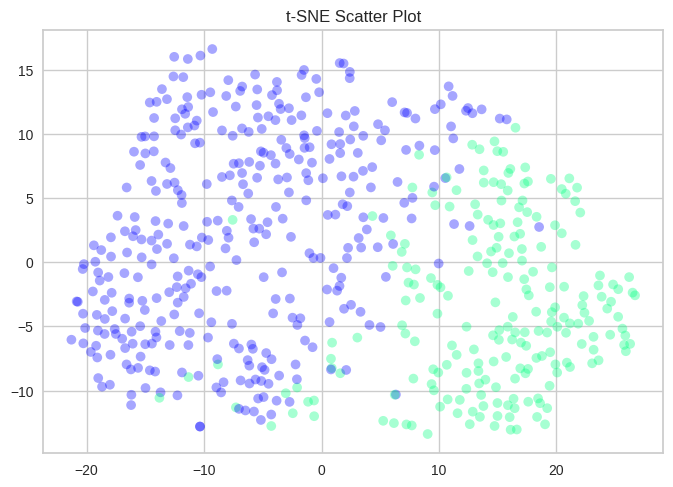

In [ ]:
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
tsne = tsne.fit_transform(X)
plt.scatter(tsne[:,0],tsne[:,1],  c = datas['diagnosis'], cmap = "winter", edgecolor = "None", alpha=0.35)
plt.title('t-SNE Scatter Plot')

<ipython-input-12-9733eec3565c>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='diagnosis', y= columns, data= datas, palette = 'Set1');
<ipython-input-12-9733eec3565c>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='diagnosis', y= columns, data= datas, palette = 'Set1');
<ipython-input-12-9733eec3565c>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='diagnosis', y= columns, data= datas, palette = 'Set1');
<ipython-input-12-9733eec3565c>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='diagnosis', y= columns, data= datas, palette = 'Set1');
<ipython-input-12-9733eec3565c>:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='diagnosis', y= columns, data= datas, palette = 'Set1');
<ipython-input-12-9733eec3565c>:4: FutureWarning: Passing `palette` without assigning `hue

<Figure size 800x550 with 0 Axes>

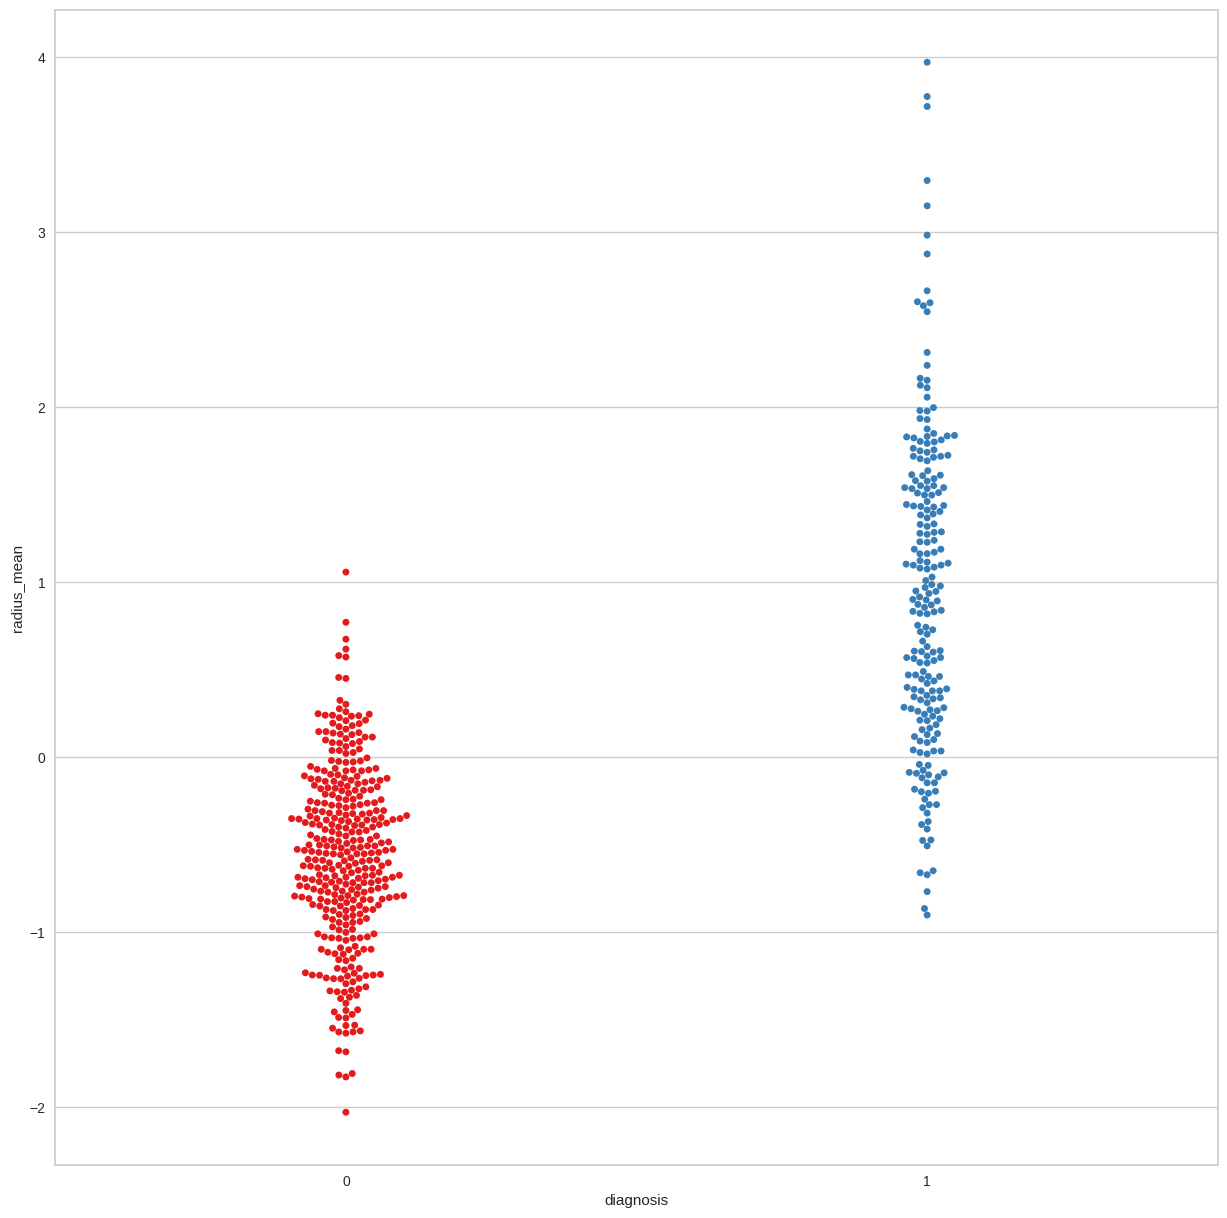

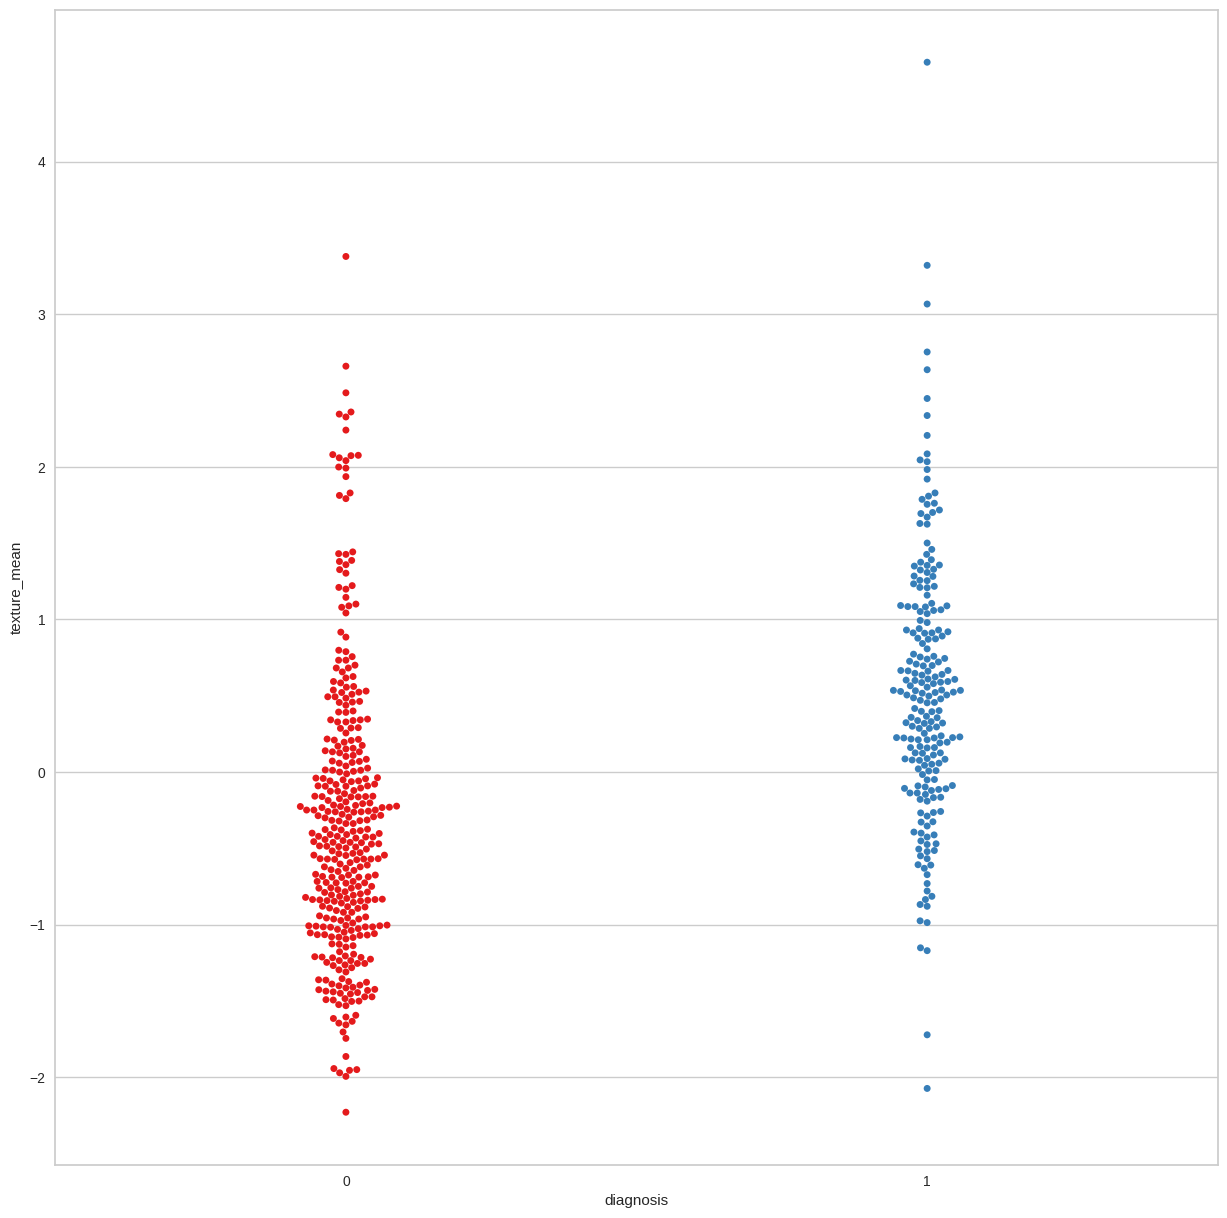

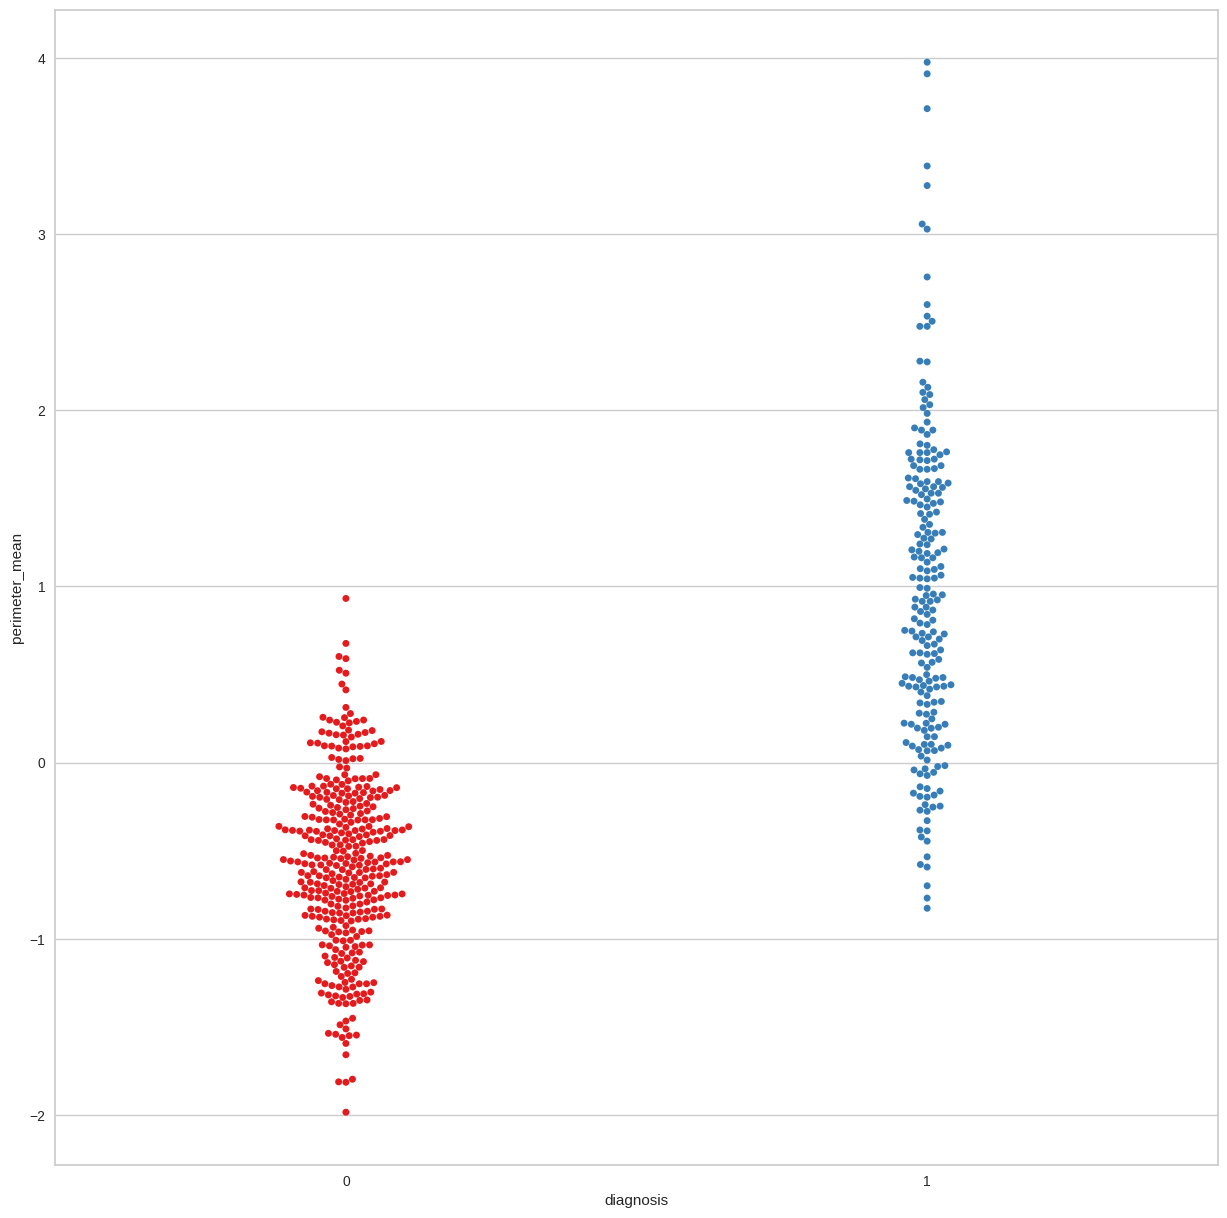

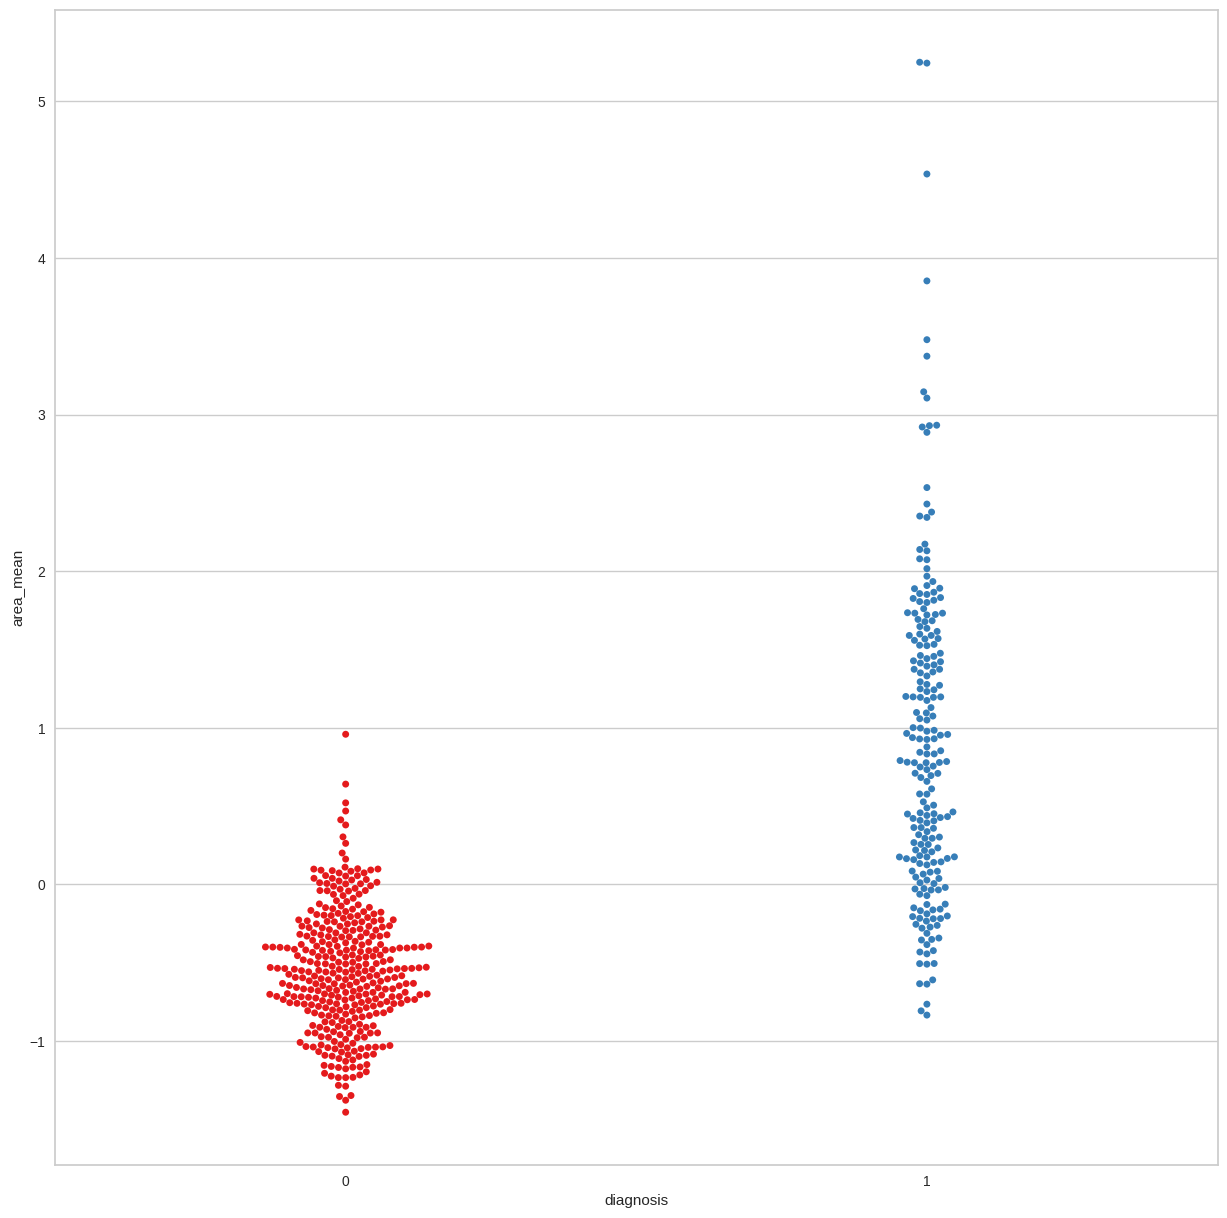

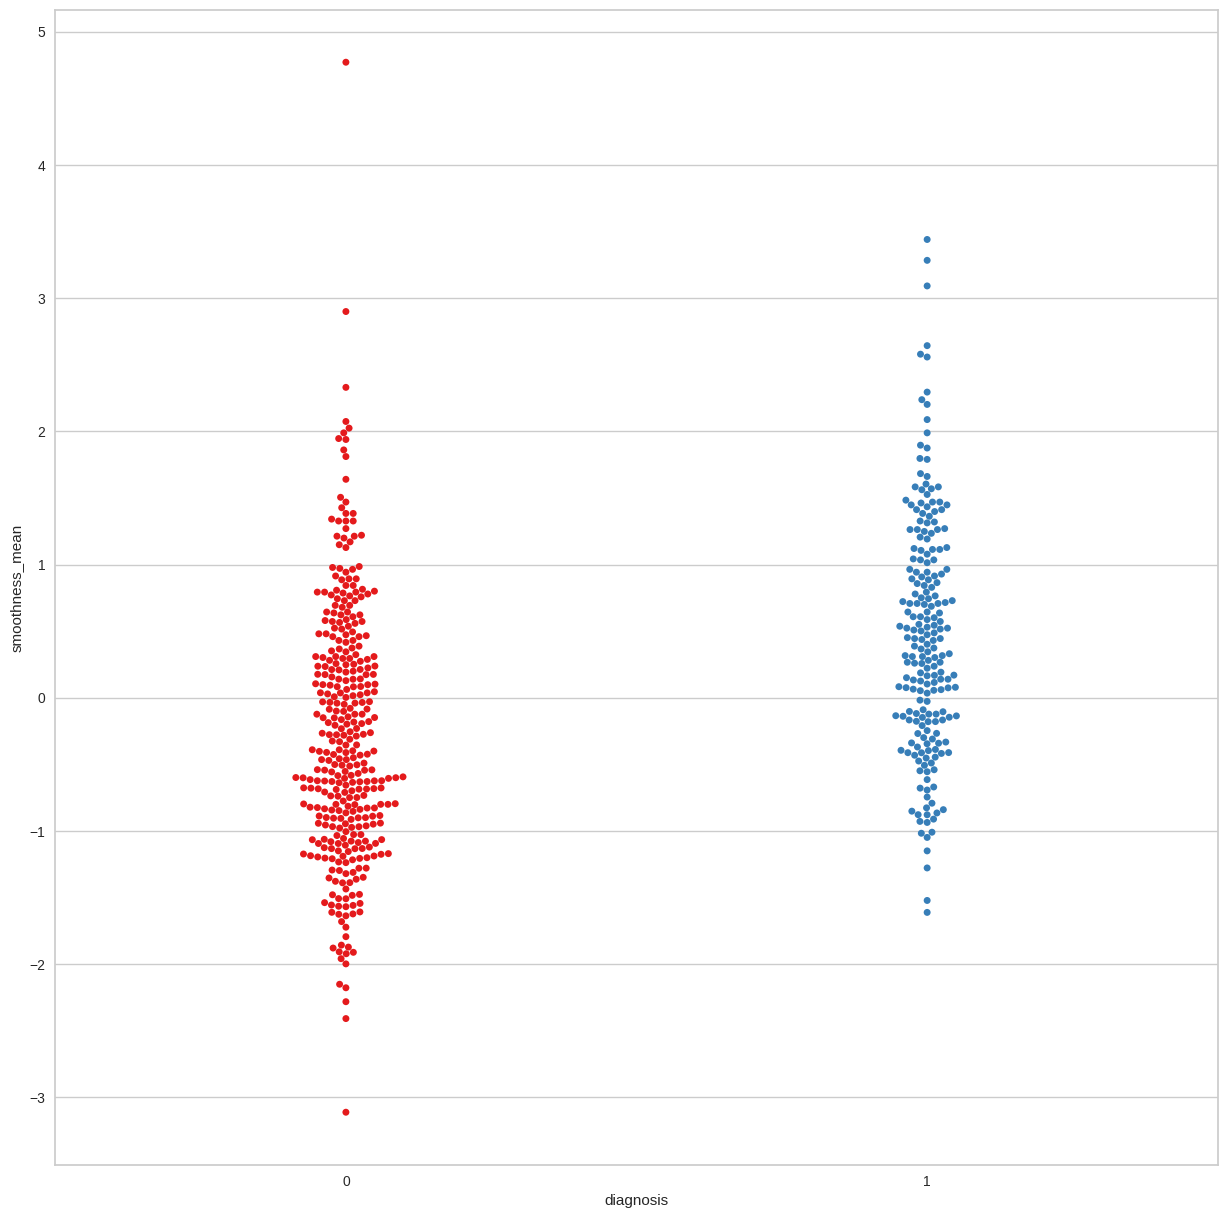

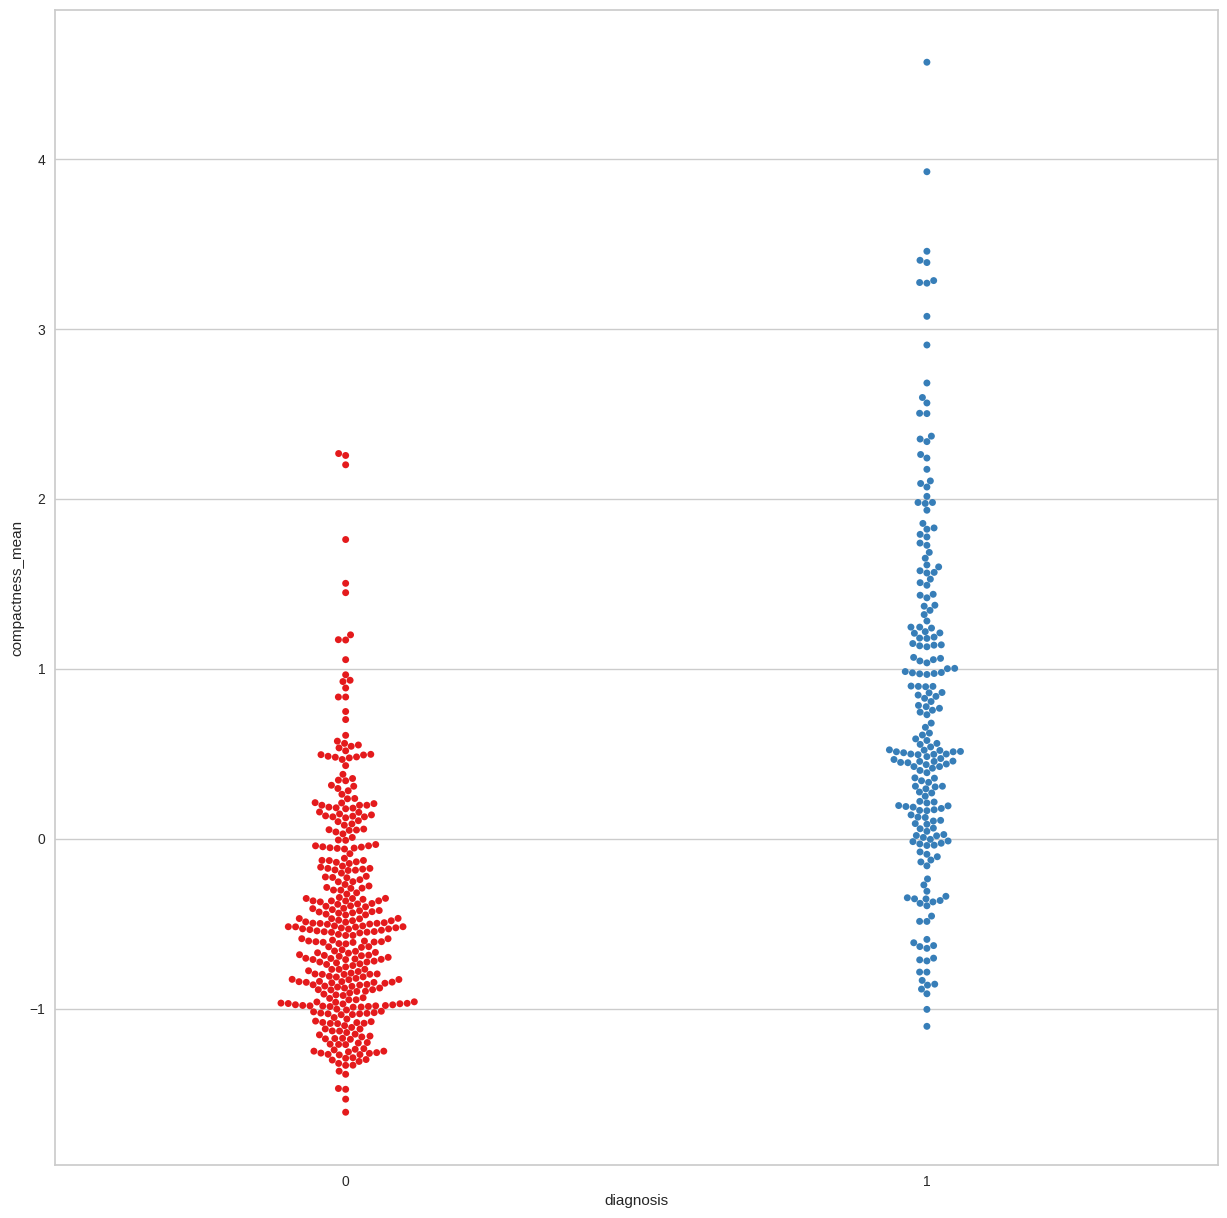

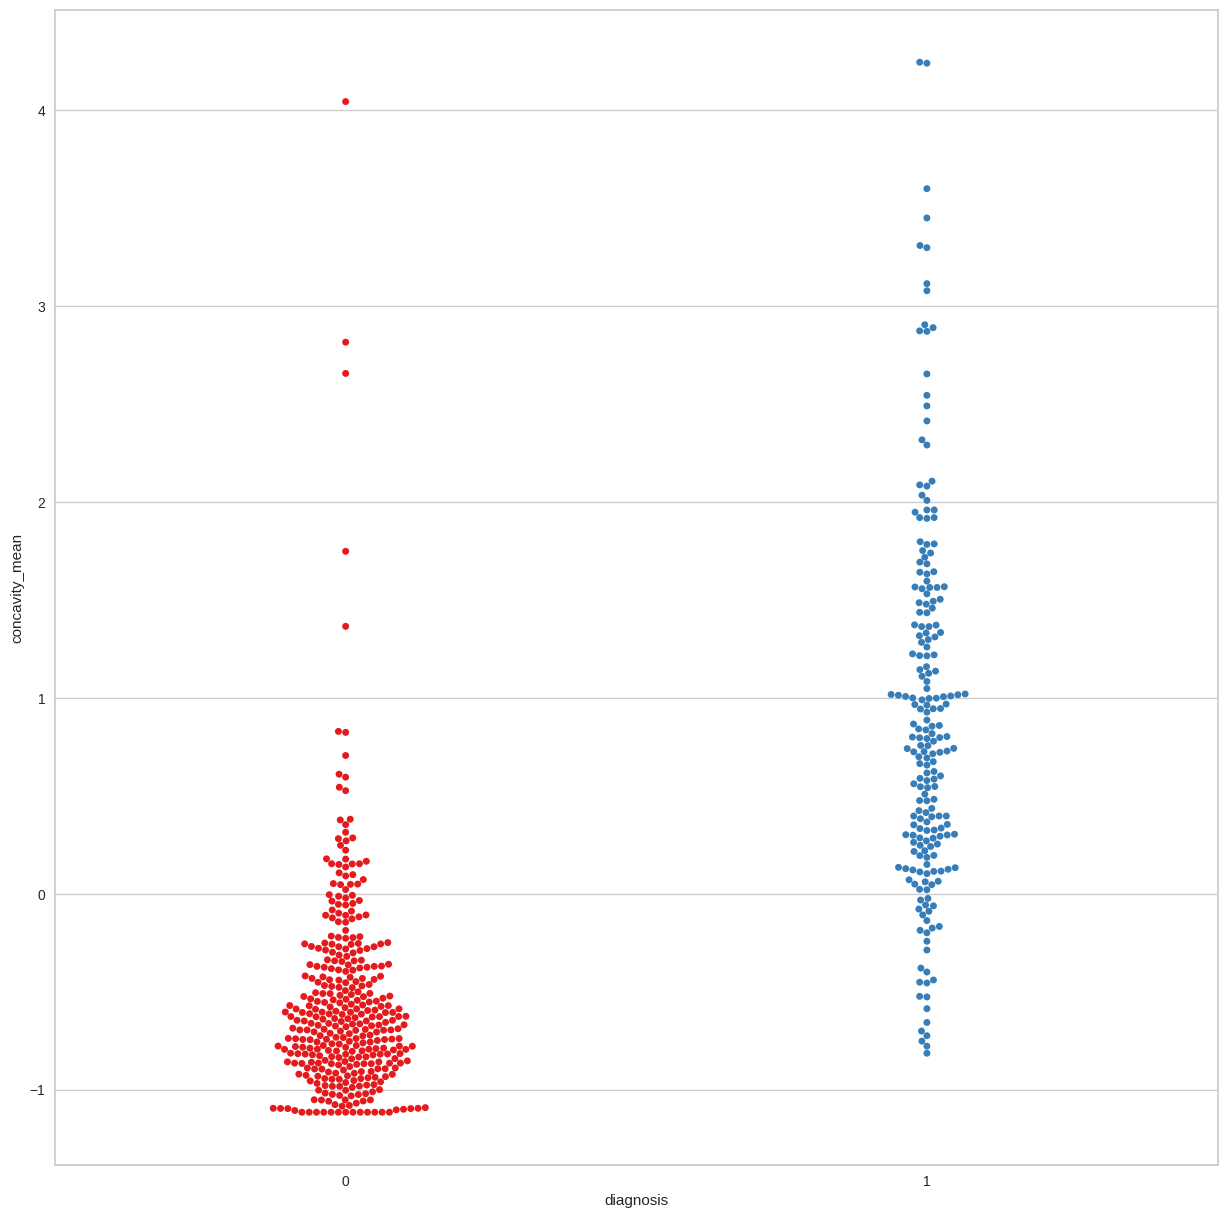

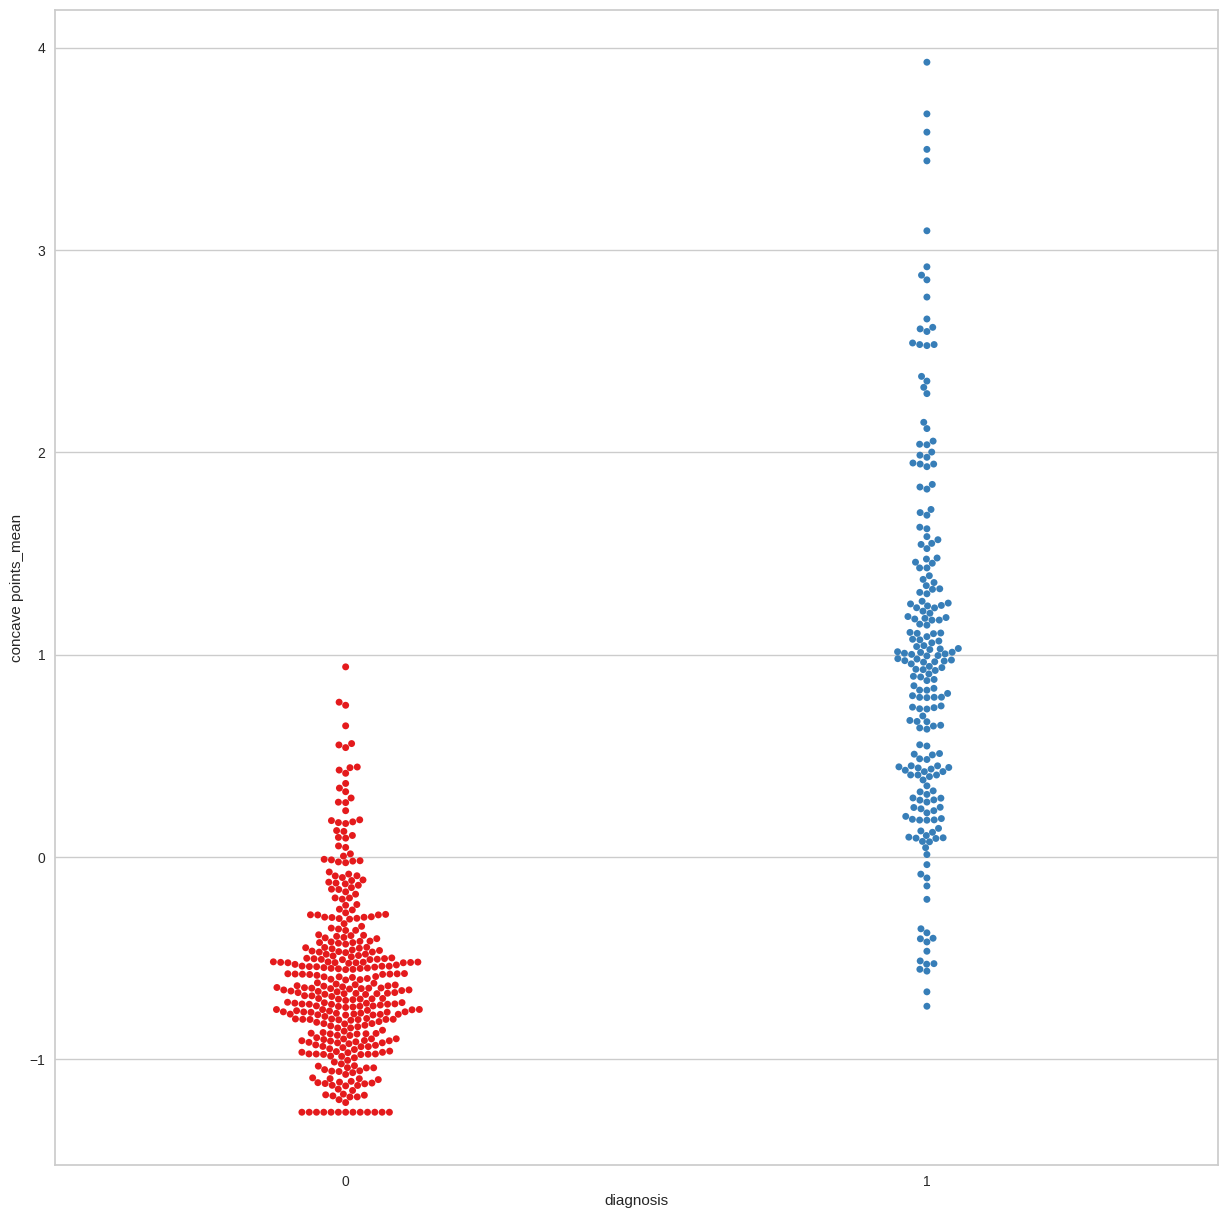

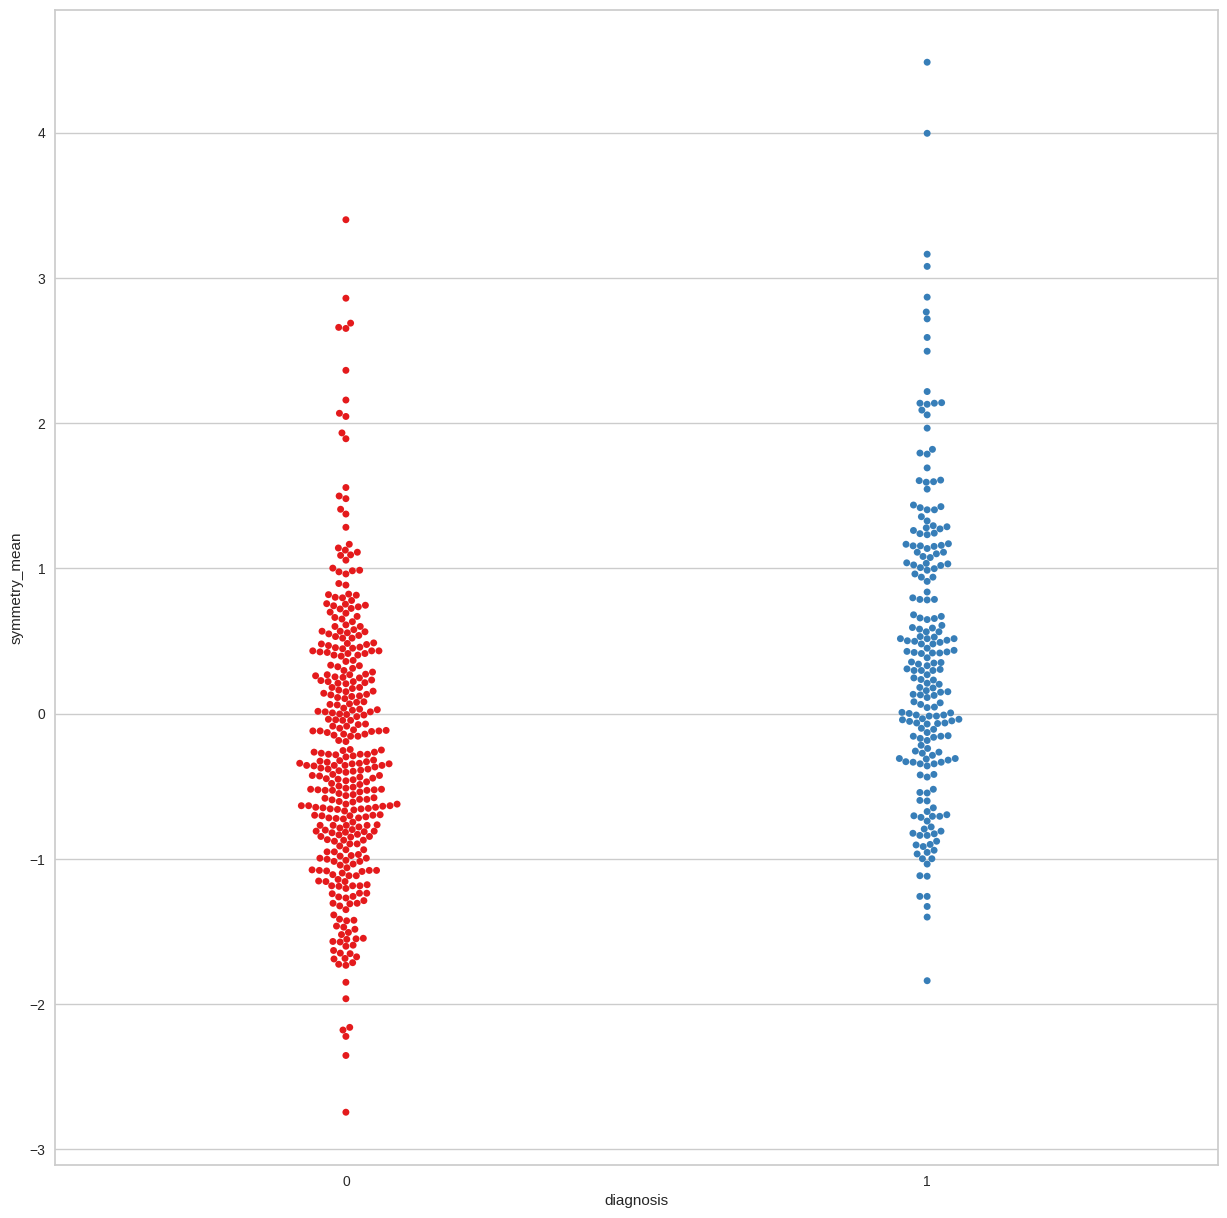

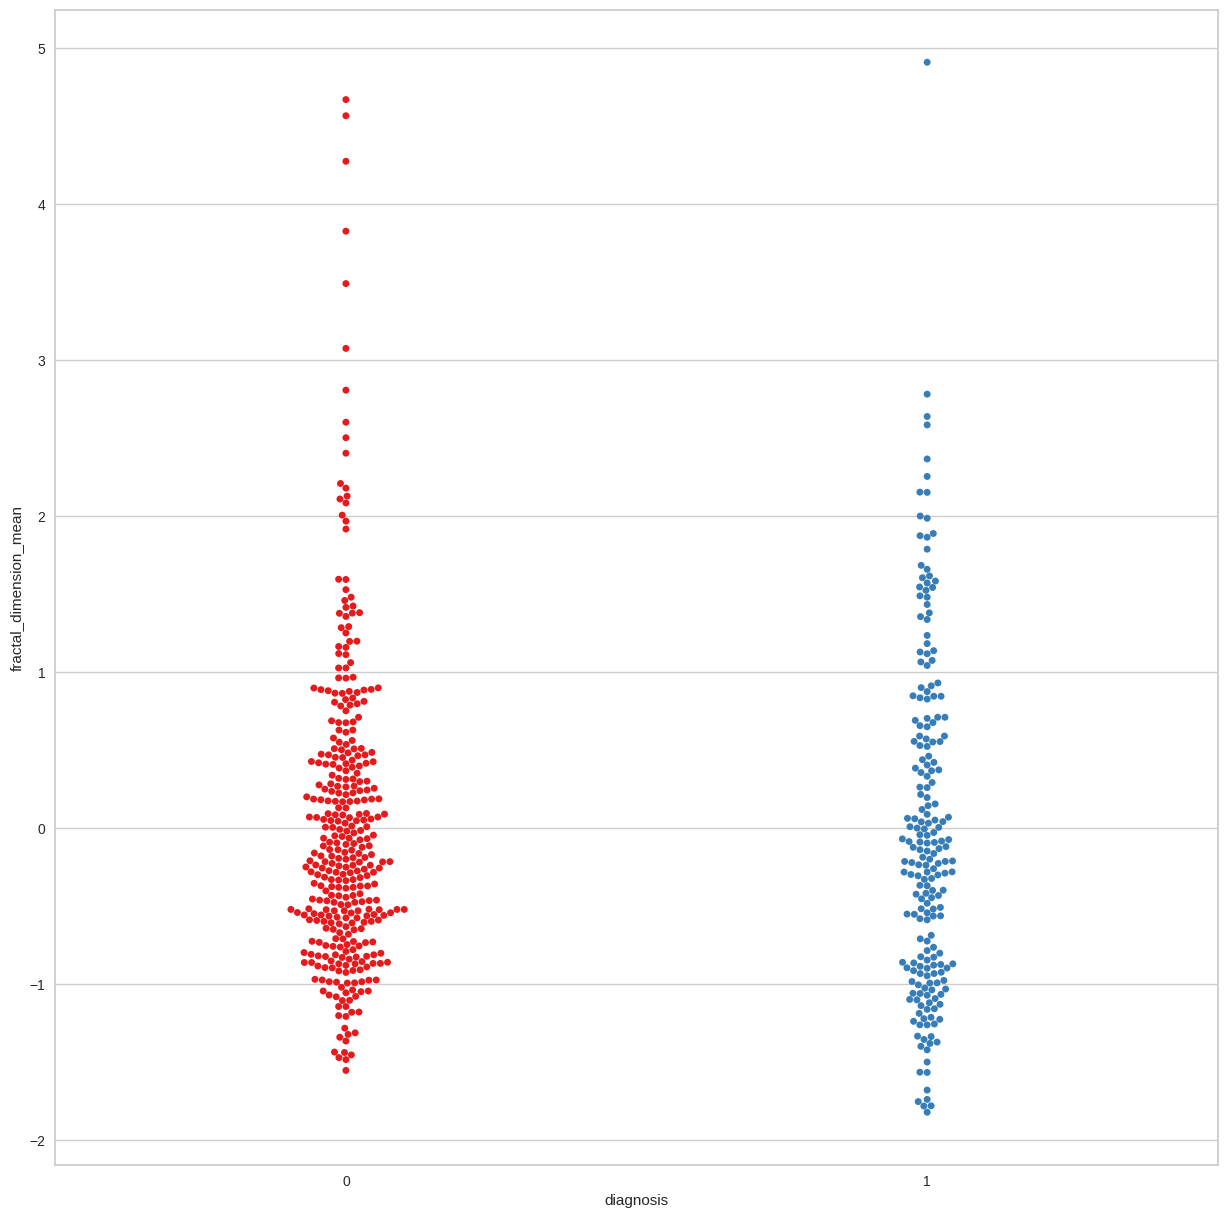

In [ ]:
for index,columns in enumerate(data_drop):
    plt.figure(index)
    plt.figure(figsize=(15,15))
    sns.swarmplot(x='diagnosis', y= columns, data= datas, palette = 'Set1');


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.002s...
[t-SNE] Computed neighbors for 569 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 0.863701
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.400856
[t-SNE] KL divergence after 1400 iterations: 0.763299


Text(0.5, 1.0, 't-SNE Scatter Plot')

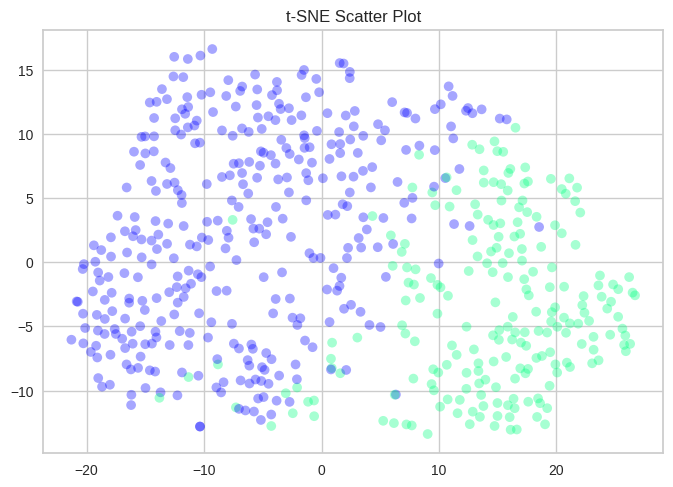

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
tsne = tsne.fit_transform(X)
plt.scatter(tsne[:,0],tsne[:,1],  c = datas['diagnosis'], cmap = "winter", edgecolor = "None", alpha=0.35)
plt.title('t-SNE Scatter Plot')